In [1]:
import pandas as pd
# activation_dateの列は日付型として読み込む
df = pd.read_csv(
      "train.csv",
      parse_dates=["activation_date"]
      )

# データが多すぎるので、最初の一部のみ表示してみる
df.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797


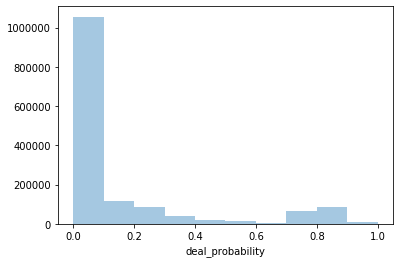

In [2]:
# データをグラフなどで可視化する
# matplotlibのラッパーseabornライブラリを利用する
# 結果はインライン出力する
import seaborn as sns
%matplotlib inline
# 1変数のヒストグラム表示
# deal_probabilityの列のヒストグラム表示
# KDE（カーネル密度推定）は非表示
# データ出現ポイントは非表示
# x軸の刻み目は10
sns.distplot(
        df["deal_probability"],
        kde=False,
        rug=False,
        bins=10
)

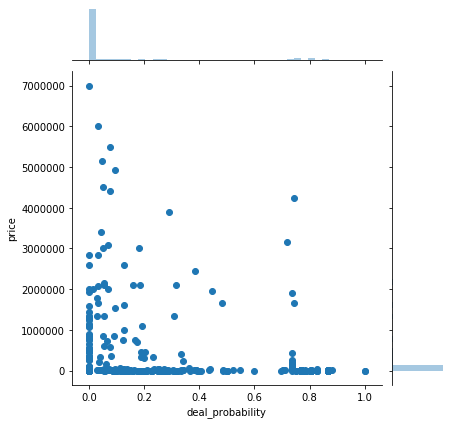

In [3]:
df = df.sample(1000)

# 2変数の散布図描画
sns.jointplot(
        x='deal_probability',
        y='price',
        data=df
)

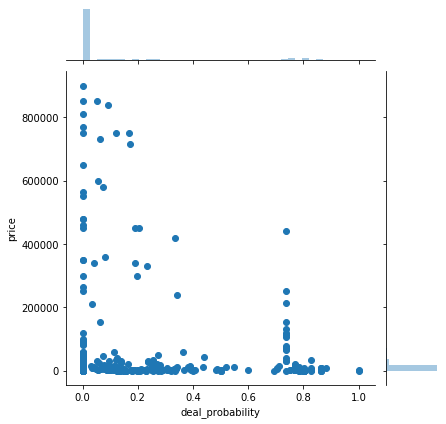

In [4]:
# 明らかな外れ値をpriceのデータから除いてみる
sns.jointplot(
        x='deal_probability',
        y='price',
        data=df[df['price']<1000000]
)


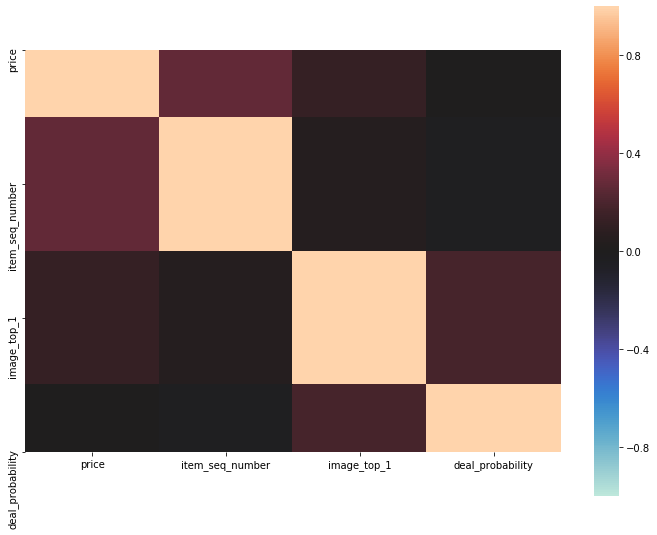

In [5]:
# ヒートマップで相関係数を可視化
import matplotlib.pyplot as plt
# NA / null値を除外して、列のペアワイズ相関を計算
df_corr = df.corr()
fig,ax = plt.subplots(figsize=(12,9))

# 相関係数をヒートマップで表示
sns.heatmap(df_corr,square=True,vmax=1,vmin=-1,
            center=0)


In [6]:

# 以下、RandomForestの導入

colmn_list =["price","item_seq_number","image_top_1","deal_probability"]
# 各データから欠損値NaNを除外する
df = df[colmn_list].dropna()

# 説明変数、目的変数
X = df.drop("price",axis=1).values
Y = df.loc[:, 'price'].values
# 学習用、検証用データに分割
from sklearn.model_selection import train_test_split
(X_train, X_test, Y_train, Y_test) = train_test_split(X
                                                      , Y
                                                      , test_size = 0.3
                                                      , random_state = 666
                                                     )
len(X_test)


264

In [7]:
len(X_train)

615